In [1]:
%matplotlib inline

In [2]:
from diffstar.tests.test_diffstar_is_frozen import DEFAULT_MS_PARAMS
from diffstar.stars import SFR_PARAM_BOUNDS
tau_dep = float(DEFAULT_MS_PARAMS[-1])
tau_dep_max = SFR_PARAM_BOUNDS['tau_dep'][3]

In [3]:
from diffstar.tests.test_diffstar_is_frozen import calc_sfh_on_default_params
_args, sfh = calc_sfh_on_default_params()
lgtarr, dtarr, dmhdt, log_mah, u_ms_params, u_q_params = _args

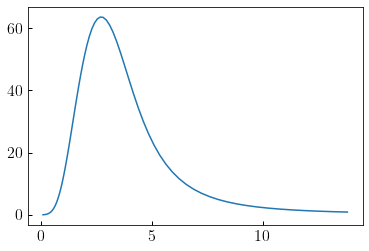

In [4]:
from diffstar.gas import _get_lagged_gas
args = lgtarr, dtarr, dmhdt, tau_dep, tau_dep_max 
lagged_gas = _get_lagged_gas(*args)

fig, ax = plt.subplots(1, 1)
__=ax.plot(10**lgtarr, lagged_gas)

In [5]:
from lax_gas import _dmgas_dt_kern

dt_const = dtarr.mean()

i = 20
t = 10**lgtarr[i-1]
t_table = 10**lgtarr[:i]
dmhdt_table = dmhdt[:i]

dmgdt_at_t = _dmgas_dt_kern(t, t_table, dt_const, dmhdt_table, tau_dep, tau_dep_max)

In [6]:
n_t = lgtarr.size
collector = []
for i in range(1, n_t):
    t = 10**lgtarr[i-1]
    t_table = 10**lgtarr[:i]
    dmhdt_table = dmhdt[:i]
    dmgdt_at_t = _dmgas_dt_kern(t, t_table, dt_const, dmhdt_table, tau_dep, tau_dep_max)
    collector.append(dmgdt_at_t)
res = np.array(collector)

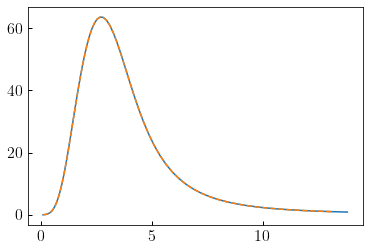

In [7]:
fig, ax = plt.subplots(1, 1)
__=ax.plot(10**lgtarr, lagged_gas)
__=ax.plot(10**lgtarr[:-1], res, '--')

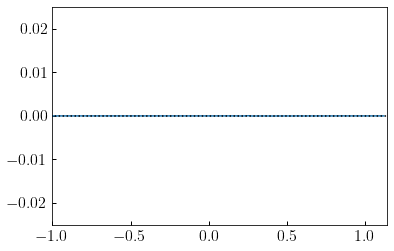

In [8]:
diff = res - lagged_gas[:-1]

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(-1, 1.14)
ylim = ax.set_ylim(-0.025, 0.025)
__=ax.plot(lgtarr[:-1], diff)
__=ax.plot(np.linspace(-10, 10, 500), np.zeros(500), ':', color='k')

In [9]:
np.allclose(res, lagged_gas[:-1], rtol=0.001)

True